#**Trabajo Práctico N°4**#
###**Alumna:** Stephany Ramírez###

</br>Diseño de un filtro para realizar la continuación ascendente y descendente de datos gravimétricos sintéticos referentes a la respuesta gravimétric de dos esferas según los siguientes parámetros: $Δσ=500\,\,kg/m^3$,$\,\,$$R=200\,\,m$,$\,\,$profundidad$\,\,$de$\,\,$$400 m$,$\,\,$posición de los centros:  $±240\,\,m$. Donde la grilla de observación viene dada por un área de $2.2\,\,km^2$,$\,\,$con$Δx=Δy=27.5\,\,m$. (a) Anomalía en Z=0m, (b)Anomalía y continuación ascendente para $Z=100m$, (c) Anomalía y continuación descendente para $Z=-20m$ y elección de un $Z$ para la continuación descendente donde podamos observar la inestabilidad del filtro</br>


####**Modelo sintético de la contribución vertical de un cuerpo esférico**####
</br>La componente vertical de la atracción gravitatoria debida a un cuerpo esférico con contraste de densidad $\Delta \sigma$  viene dada por la siguiente expresión:

$g_z(r,r_0)\,\,=\,\,g\cdot \widehat{k}\,\,=\,\,\frac{4}{3}\cdot\pi \cdot R^3\cdot G \Delta \sigma\cdot (\frac{z−z_0}{\sqrt{(x−x_0)^2+(y−y_0)^2+(z−z_0)^2}^3}^)$
 
donde $r=(x,y,z)$ son las coordenadas del punto de observación, $r_0=(x_0,y_0,z_0)$las coordenadas del centro de la esfera, $R$ el radio de la esfera y $r^2=||r−r_0||_2^2=(x−x_0)^2+(y−y_0)^2+(z−z_0)^2$.

In [69]:
#Importo módulos
import numpy as np
import matplotlib.pyplot as plt
#

###**Defino subrutinas**###

In [77]:
#Rutina de anomalía de esfera
#
def g_vert(h,X,X0,R,drho):
  #Constante de gravitación universal
  G=6.67408e-11  #m^3/kg.s^2
  #
  #Constante de conversión de m/s^2 a mGal
  conv=1e5
  #
  #Amplitud de la contribución
  ctte=((4/3)*np.pi*(R**3)*drho*G)*conv
  #
  #Contribución
  x,y,z=X
  z = h * z
  x0,y0,z0=X0
  g_z=ctte*((z-z0)/(np.sqrt((x-x0)**2+(y-y0)**2+(z-z0)**2)**3))
#
  return g_z
#
#Defino subrutina para el cálculo del número de onda
def kr(nx,ny,delx,dely):
    #
    kx = np.zeros(nx, dtype=float)
    #
    #Evaluando cada k y preguntando si k >= Nyquist == pi
    #
    dk = (2 * np.pi / nx)
    #
    for j in np.arange(nx):
        kx[j] = dk * j
        if kx[j] >= np.pi:
            kx[j] = kx[j] - 2.0 * np.pi
    #
    # Para mayor facilidad, para calcular ky, definiremos:
    ky = kx
    #
    #Calculo el numero de onda radial
    kr = np.zeros(nx*ny).reshape(nx,ny)
    #
    for i in np.arange(nx):
        kr[i, :] = np.sqrt((kx[i]/delx)** 2 + (ky[:]/dely)** 2)
    #
    return kr
#
#Defino función de continuación ascentente o descendente (Continuación analitica)
# Z > 0 para continuación ascendente
# Z < 0 para continuación descendente
#
def cont_a(kr,z):
  #
  H = np.exp(-kr*z)
  #
  return H

###**Defino grilla de observación y parámetros de los cuerpos**###

In [78]:
#Defino parámetros de longiud y espaciamiento en x e y:
L      = 1100    #m
nx, ny = (81,81) #m
#
#Defino vector de muestras equiespaciadas desde -L a L, con
#espaciamiento nx y ny:
xx    = np.linspace(-L, L, nx)  #m
yy    = np.linspace(-L, L, ny)  #m
#
#Defino la grilla:
x, y  = np.meshgrid(xx, yy)
#
#Defino arreglo de ceros con la misma longitud que x:
z     = np.ones_like(x)
#
#Parámetros
#
#Contraste de densidad
drho  = 500              #kg/m^3
#Radio de la esfera
R     = 200              #m
#Ubicación del/los cuerpos (x0,y0,z0)
X01   = (240,0,-400)     #m
X02   = (-240,0,-400)    #m
#Datos
X     = (x,y,z)
#
#Altura a la cual vemos el cuerpo y calculamos la anomalía
h1=0
h2=100
h3=-20
#
#Contribuciones
#Para h1
g_z1  = g_vert(h1,X,X01,R,drho)    #mGal
g_z2  = g_vert(h1,X,X02,R,drho)    #mGal
g_zt  = g_z1+g_z2                  #mGal
#
#Para h2
g_zz1  = g_vert(h2,X,X01,R,drho)   #mGal
g_zz2  = g_vert(h2,X,X02,R,drho)   #mGal
g_zzt  = g_zz1+g_zz2               #mGal
#
#Para h3
g_zzz1  = g_vert(h3,X,X01,R,drho)  #mGal
g_zzz2  = g_vert(h3,X,X02,R,drho)  #mGal
g_zzzt  = g_zzz1+g_zzz2            #mGal

###**Aplicación de los filtros de continuación ascendente y descendente para los datos sintéticos**###

In [79]:
#Aplico la continuación analítica a los datos
#
#Defino el deltaZ para cada uno de los filtros a aplicar
zz     =100 #Para continuación ascendente
zzz    =-20 #Para continuación descendente
zzzz   =-80 #Para continuación descendente instable
#
#Defino deltas de longitud en cada dirección delx y dely
delx  =xx[2]-xx[1]
dely  =yy[2]-yy[1]
#
#Defino el número de onda
kr    = kr(nx,ny,delx,dely)
#
#Defino el filtro en frecuencia para la continuación ascendente y descendente
filtro_ca= cont_a(kr,zz)
filtro_cd= cont_a(kr,zzz)
filtro_inest= cont_a(kr,zzzz)
#
#Transformo mis datos del dominio espacial al dominio de los números de onda
G_ZT  = np.fft.fft2(g_zt)
#
#Aplico el filtro en frecuencia
G_ZT_fil_ca = filtro_ca*G_ZT
G_ZT_fil_cd = filtro_cd*G_ZT
G_ZT_fil_inest = filtro_inest*G_ZT
#
#Antitransformo para ir al dominio espacial
g_zt_fil_ca= np.real(np.fft.ifft2(G_ZT_fil_ca)) #Para Z=100 
g_zt_fil_cd=np.real(np.fft.ifft2(G_ZT_fil_cd))  #Para Z=-20 
g_zt_fil_inest=np.real(np.fft.ifft2(G_ZT_fil_inest)) #Para Z=-80 

###**Graficos**###

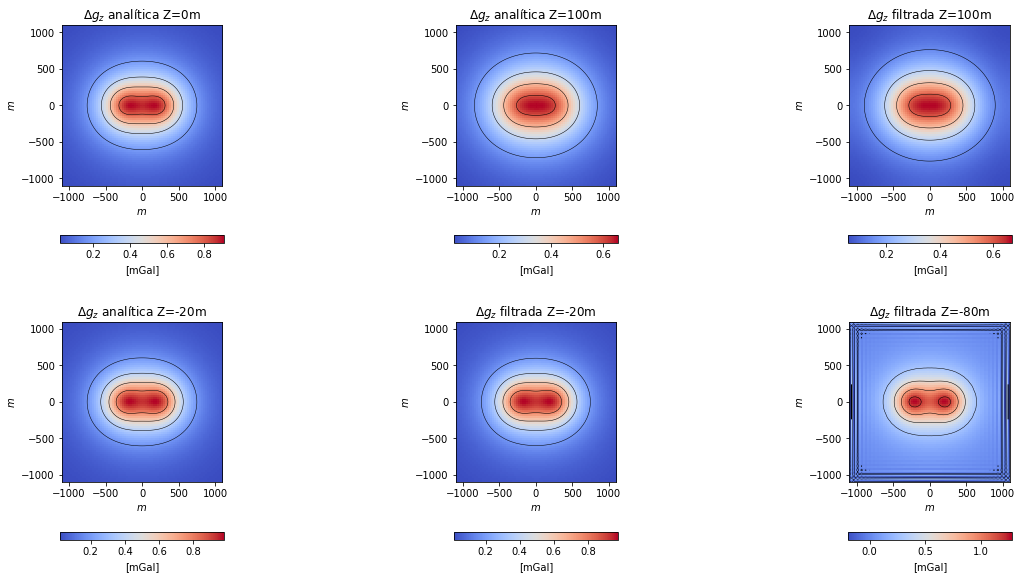

In [83]:
#Gráfico de los datos anteriores
fig = plt.figure(figsize=(20, 10))
#------------------------------------------------Figura 1------------------------------------------
ax = fig.add_subplot(2, 3, 1)
im=ax.imshow(g_zt,origin="lower",cmap="coolwarm",extent=[-L,L,-L,L],interpolation='nearest')
fig.colorbar(im,orientation='horizontal',pad=0.2,shrink=0.5).set_label('[mGal]', labelpad=5, y=0.5, rotation=0)
ax.contour(x,y,g_zt,4,linewidths=0.5,colors='k')
ax.set_title(r'$\Delta g_z$ analítica Z=0m')
ax.set_xlabel("$m$")
ax.set_ylabel("$m$")
#-------------------------------------------------Figura 2-------------------------------------------
ax = fig.add_subplot(2, 3, 2)
im=ax.imshow(g_zzt,origin="lower",cmap="coolwarm",interpolation='nearest',extent=[-L,L,-L,L])
fig.colorbar(im,orientation='horizontal',pad=0.2,shrink=0.5).set_label('[mGal]', labelpad=5, y=0.5, rotation=0)
ax.contour(x,y,g_zzt,4,linewidths=0.5,colors='k')
ax.set_title(r'$\Delta g_z$ analítica Z=100m')
ax.set_xlabel("$m$")
ax.set_ylabel("$m$")
#--------------------------------------------------Figura 3------------------------------------------
ax = fig.add_subplot(2, 3, 3)
im=ax.imshow(g_zt_fil_ca,origin="lower",cmap="coolwarm",interpolation='nearest',extent=[-L,L,-L,L])
fig.colorbar(im,orientation='horizontal',pad=0.2,shrink=0.5).set_label('[mGal]', labelpad=5, y=0.5, rotation=0)
ax.contour(x,y,g_zt_fil_ca,4,linewidths=0.5,colors='k')
ax.set_title(r'$\Delta g_z$ filtrada Z=100m')
ax.set_xlabel("$m$")
ax.set_ylabel("$m$")
#--------------------------------------------------Figura 4------------------------------------------
ax = fig.add_subplot(2, 3, 4)
im=ax.imshow(g_zzzt,origin="lower",cmap="coolwarm",interpolation='nearest',extent=[-L,L,-L,L])
fig.colorbar(im,orientation='horizontal',pad=0.2,shrink=0.5).set_label('[mGal]', labelpad=5, y=0.5, rotation=0)
ax.contour(x,y,g_zzzt,4,linewidths=0.5,colors='k')
ax.set_title(r'$\Delta g_z$ analítica Z=-20m')
ax.set_xlabel("$m$")
ax.set_ylabel("$m$")
#--------------------------------------------------Figura 5------------------------------------------
ax = fig.add_subplot(2, 3, 5)
im=ax.imshow(g_zt_fil_cd,origin="lower",cmap="coolwarm",interpolation='nearest',extent=[-L,L,-L,L])
fig.colorbar(im,orientation='horizontal',pad=0.2,shrink=0.5).set_label('[mGal]', labelpad=5, y=0.5, rotation=0)
ax.contour(x,y,g_zt_fil_cd,4,linewidths=0.5,colors='k')
ax.set_title(r'$\Delta g_z$ filtrada Z=-20m')
ax.set_xlabel("$m$")
ax.set_ylabel("$m$")
#--------------------------------------------------Figura 6-------------------------------------------
ax = fig.add_subplot(2, 3, 6)
im=ax.imshow(g_zt_fil_inest,origin="lower",cmap="coolwarm",interpolation='nearest',extent=[-L,L,-L,L])
fig.colorbar(im,orientation='horizontal',pad=0.2,shrink=0.5).set_label('[mGal]', labelpad=5, y=0.5, rotation=0)
ax.contour(x,y,g_zt_fil_inest,4,linewidths=0.5,colors='k')
ax.set_title(r'$\Delta g_z$ filtrada Z=-80m')
ax.set_xlabel("$m$")
ax.set_ylabel("$m$")

#Si se desea osbservar tanto el número de onda como alguno de los filtros utilizados en esta Notebook
#se debe descomentar las siguientes lineas de código:
#
#--------------------------------------------------Figura 5------------------------------------------
#ax = fig.add_subplot(2, 3, 6)
#extent=[0,2*np.pi,0,2*np.pi]
#im=ax.imshow(kr,origin="lower",extent= extent,cmap="gray",interpolation='none')
#fig.colorbar(im,orientation='horizontal',pad=0.2,shrink=0.5).set_label('[]', labelpad=5, y=0.5, rotation=0)
#ax.set_title("$|k_r|$")
#ax.set_xlabel("$k_x$")
#ax.set_ylabel("$k_y$")
#ax.set_xticks([0,np.pi,2*np.pi])
#ax.set_yticks([0,np.pi,2*np.pi])
#---------------------------------------------.----Figura 6------------------------------------------
#ax = fig.add_subplot(2, 3, 5)
#extent=[0,2*np.pi,0,2*np.pi]
#im=ax.imshow(np.abs(np.fft.fftshift(XXXX)),origin="lower",extent=extent,cmap="gray",interpolation='none')
#fig.colorbar(im,orientation='horizontal',pad=0.2,shrink=0.5).set_label('[]', labelpad=5, y=0.5, rotation=0)
#ax.set_title("$Filtro$")
#ax.set_xlabel("$\Delta xk_x$")
#ax.set_ylabel("$\Delta yk_y$")
#ax.set_xticks([0,np.pi,2*np.pi])
#ax.set_yticks([0,np.pi,2*np.pi])

#Donde XXXX es el nombre del filtro que deseemos observar

plt.show()

###**Comentarios**###

Por medio de la aplicación de las subrutinas para el cálculo de la continuación analítica (ascendente y descendente), podemos observar para dos casos distintos, que los datos sintéticos o generados por medio de la expresión matemática de la anomalía de las esferas se condice con lo obtenido para un dato sintético en Z=0 y llevado a una altura Z=100 o Z=-20, es decir, tomando la expresión de continuación ascendente y descendente se verifica que al tomar valores de gravedad y por ende calcular anomalías para un cierto nivel de altura, se pueden trasladar las mismas a otro nivel de altura deseado, bien sea ascendente respecto del nivel de referencia o descendente al mismo. 

Esto representa una gran ventaja para la aplicación de cualquier método potencial, ya que en caso de ser necesario, podríamos implementar una manera sencilla para el cálculo de las anomalías a un cierto nivel y simplemente trasladarlo a otro nivel, sin considerar las dificultades que pueda representar el medirlas directamente en ese nivel, este es el caso de la aerogravimetría, donde podemos tomar datos a un nivel de altura aproximado respecto de la superficie de la Tierra y posteriormente si queremos llevar estas anomalías al nivel de la superficie, aplicaríamos estas rutinas.

Posteriormente, podemos observar que la subrutina para el calculo de la continuación descendente, si bien, es bueno para alturas de magnitud pequeña, para un valor de |Z| muy grande (es decir, muy negativo), por ejemplo Z=-80m, podríamos tener ciertas inestabilidades, como producto del propio cálculo numérico de las expresiones teóricas.